<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> Reflections</b></font>
<br>
_prepared by Abuzer Yakaryilmaz_
<br><br>
[<img src="../qworld/images/watch_lecture.jpg" align="left">](https://youtu.be/nzj7kw1Ycms)
<br><br><br>

_We use certain tools from python library "<b>matplotlib.pyplot</b>" for drawing. Check the notebook [Python: Drawing](../python/Python06_Drawing.ipynb) for the list of these tools._

We start with a very basic reflection.

<h3> Z-gate (operator) </h3>

The indentity operator $ I = \mymatrix{cc}{1 & 0 \\ 0 & 1} $ does not affect the computation.

What about the following operator?

$ Z = \Z $.

It is very similar to the identity operator.

Consider the quantum state $ \ket{u} = \myvector{ \frac{3}{5} \\ \frac{4}{5} }  $.

We calculate the new quantum state after applying $ Z $ to $ \ket{u} $:

$ \ket{u'} = Z \ket{u} =  \Z  \myvector{ \frac{3}{5} \\ \frac{4}{5} } =  \myrvector{ \frac{3}{5} \\ -\frac{4}{5} } $.

We draw both states below.

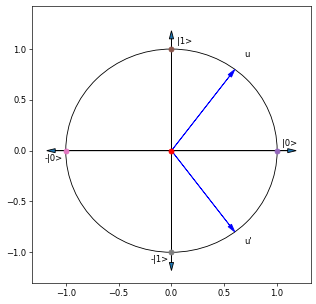

In [2]:
%run quantum.py

draw_qubit()

draw_quantum_state(3/5,4/5,"u")

draw_quantum_state(3/5,-4/5,"u'")

show_plt()

When we apply $ Z $ to the state $ \ket{u'} $, we obtain the state $\ket{u}$ again: $  \Z \myrvector{ \frac{3}{5} \\ -\frac{4}{5} } =  \myvector{ \frac{3}{5} \\ \frac{4}{5} }  $.

It is easy to see that the operator $Z$ is a reflection and its **line of reflection** is the $x$-axis.

Remark that applying the same reflection twice on the unit circle does not make any change.

<h3> Task 1 </h3>

Create a quantum circuit with 5 qubits.

Apply h-gate (Hadamard operator) to each qubit.

Apply z-gate ($Z$ operator) to randomly picked qubits.

Apply h-gate to each qubit.

Measure each qubit.

Execute your program 1000 times.

Compare the outcomes of the qubits affected by z-gates and the outcomes of the qubits not affected by z-gates.

Does z-gate change the outcome?

Why?

Z-gates applied to qubits: [0, 1, 2]


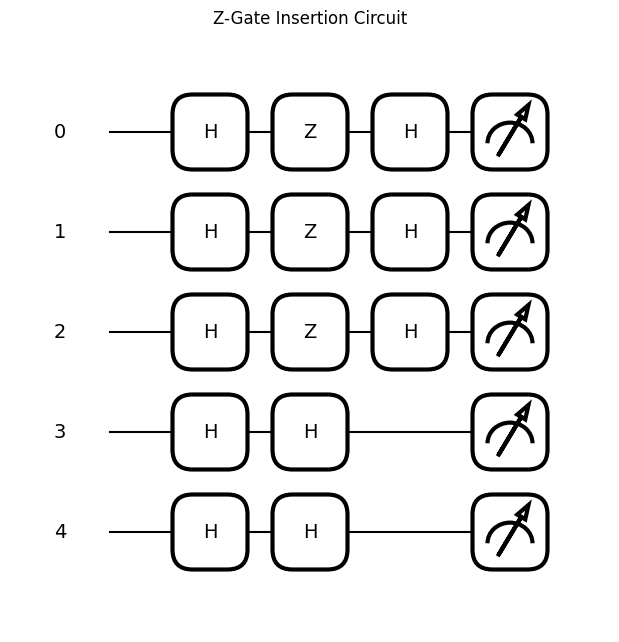

In [19]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

# Setup
number_of_qubits = 5
shots = 1000

# Randomly pick which qubits get Z gates
z_applied = []
for i in range(number_of_qubits):
    if randrange(2) == 0:
        z_applied.append(i)

print(f"Z-gates applied to qubits: {z_applied}")

# Define a PennyLane device
dev = qml.device("default.qubit", wires=number_of_qubits, shots=shots)

# Define the QNode (circuit)
@qml.qnode(dev)
def z_gate_circuit():
    # Step 1: Apply H to all qubits
    for i in range(number_of_qubits):
        qml.Hadamard(wires=i)
    
    # Step 2: Apply Z-gate to selected qubits
    for i in z_applied:
        qml.PauliZ(wires=i)

    # Step 3: Apply H to all qubits again
    for i in range(number_of_qubits):
        qml.Hadamard(wires=i)

    # Step 4: Measure all qubits
    return qml.sample(wires=range(number_of_qubits))

# Draw the circuit
fig, ax = qml.draw_mpl(z_gate_circuit)()
plt.title("Z-Gate Insertion Circuit")
plt.show()

In [22]:
# Run the circuit
samples = z_gate_circuit()  # shape (shots, qubits)

# Convert to NumPy array if not already
samples = np.array(samples)

# Tally counts
from collections import Counter

# Convert each shot (array of 5 bits) to a bitstring
bitstrings = ["".join(str(b) for b in shot) for shot in samples]
counts = Counter(bitstrings)
print("Measurement Counts:", dict(counts))

Measurement Counts: {'11100': 1000}


<h3> Hadamard operator </h3>

Is Hadamard operator a reflection? If so, what is its line of reflection?

Remember the following transitions.

$ H \ket{0} = \hadamard \vzero = \stateplus = \ket{+} ~~~$ and $~~~ H \ket{+} = \hadamard \stateplus = \vzero = \ket{0} $.

$ H \ket{1} = \hadamard \vone = \stateminus = \ket{-} ~~~$ and $~~~ H \ket{-} = \hadamard \stateminus = \vone = \ket{1} $.

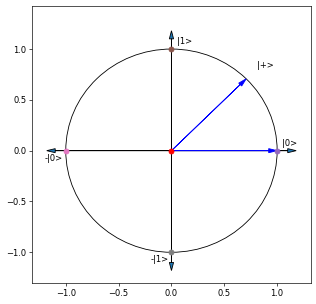

In [23]:
%run quantum.py

draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(1,0,"")

draw_quantum_state(1/sqrttwo,1/sqrttwo,"|+>")

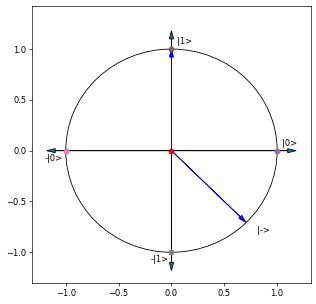

In [24]:
%run quantum.py

draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(0,1,"")

draw_quantum_state(1/sqrttwo,-1/sqrttwo,"|->")

<h3> Hadamard - geometrical interpretation </h3>

Hadamard operator is a reflection and its line of reflection is represented below.

It is the line obtained by rotating $x$-axis with $ \frac{\pi}{8} $ radians in counter-clockwise direction.

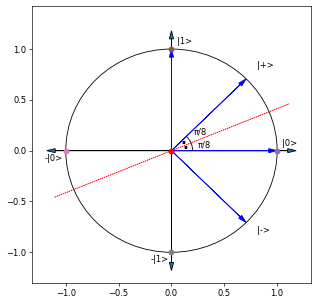

In [25]:
%run quantum.py

draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(1,0,"")
draw_quantum_state(1/sqrttwo,1/sqrttwo,"|+>")

draw_quantum_state(0,1,"")
draw_quantum_state(1/sqrttwo,-1/sqrttwo,"|->")

# line of reflection for Hadamard
from matplotlib.pyplot import arrow
arrow(-1.109,-0.459,2.218,0.918,linestyle='dotted',color='red')

# drawing the angle with |0>-axis
from matplotlib.pyplot import gca, text
from matplotlib.patches import Arc
gca().add_patch( Arc((0,0),0.4,0.4,angle=0,theta1=0,theta2=22.5) )
text(0.09,0.015,'.',fontsize=30)
text(0.25,0.03,'\u03C0/8')
gca().add_patch( Arc((0,0),0.4,0.4,angle=0,theta1=22.5,theta2=45) )
text(0.075,0.065,'.',fontsize=30)
text(0.21,0.16,'\u03C0/8')
show_plt()

<h3> Task 2 </h3>

Randomly create a quantum state and multiply it with Hadamard matrix to find its reflection.

Draw both states.

Repeat the task for a few times.

In [26]:
# randomly create a 2-dimensional quantum state
from math import cos, sin, pi
from random import randrange
def random_qstate_by_angle():
    angle_degree = randrange(360)
    angle_radian = 2*pi*angle_degree/360
    return [cos(angle_radian),sin(angle_radian)]

0.7986355100472929 0.6018150231520482
0.9902680687415701 0.13917310096006558


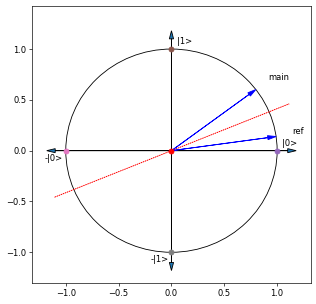

In [27]:
%run quantum.py

draw_qubit()

# line of reflection for Hadamard
from matplotlib.pyplot import arrow
arrow(-1.109,-0.459,2.218,0.918,linestyle='dotted',color='red')

[x1,y1] = random_qstate_by_angle()

print(x1,y1)

sqrttwo=2**0.5
oversqrttwo = 1/sqrttwo

[x2,y2] = [ oversqrttwo*x1 + oversqrttwo*y1 , oversqrttwo*x1 - oversqrttwo*y1 ]

print(x2,y2)

draw_quantum_state(x1,y1,"main")

draw_quantum_state(x2,y2,"ref")

show_plt()

<h3> Task 3 </h3>

Find the matrix representing the reflection over the line $y=x$.

<i>Hint: Think about the reflections of the points $ \myrvector{0 \\ 1} $, $ \myrvector{-1 \\ 0} $, and $ \myrvector{-\sqrttwo \\ \sqrttwo} $ over the line $y=x$.</i>

Randomly create a quantum state and multiply it with this matrix to find its reflection over the line $y = x$.

Draw both states.

Repeat the task for a few times.

<h3>Solution</h3>
The reflection over the line $y=x$ swaps the first and second amplitudes.

This is the operator NOT: $ X = \mymatrix{rr}{0 & 1 \\ 1 & 0} $.

A function for randomly creating a 2-dimensional quantum state:

In [28]:
# randomly create a 2-dimensional quantum state
from math import cos, sin, pi
from random import randrange
def random_qstate_by_angle():
    angle_degree = randrange(360)
    angle_radian = 2*pi*angle_degree/360
    return [cos(angle_radian),sin(angle_radian)]

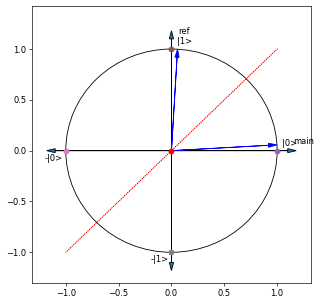

In [29]:
%run quantum.py

draw_qubit()

# the line y=x
from matplotlib.pyplot import arrow
arrow(-1,-1,2,2,linestyle='dotted',color='red')

[x1,y1] = random_qstate_by_angle()

[x2,y2] = [y1,x1]

draw_quantum_state(x1,y1,"main")
draw_quantum_state(x2,y2,"ref")

show_plt()

<h3>Reflection Operators</h3>

As we have observed, the following operators are reflections on the unit circle.

<b> Z operator:</b> $ Z = \mymatrix{rr}{ 1 & 0 \\ 0 & -1 } $. The line of reflection is $x$-axis.

<b> NOT operator:</b> $ X = \mymatrix{rr}{ 0 & 1 \\ 1 & 0 } $. The line of reflection is $y=x$.

<b> Hadamard operator:</b> $ H = \hadamard $. The line of reflection is $y= \frac{\sin(\pi/8)}{\cos(\pi/8)} x$. 

It is the line passing through the origin making an angle $ \pi/8 $ radians with $x$-axis.

<b>Arbitrary reflection operator:</b> Let $ \theta $ be the angle of the line of reflection. Then, the martix form of reflection is represented as follows:

$$ Ref(\theta) = \mymatrix{rr}{ \cos(2\theta) & \sin(2\theta) \\ \sin(2\theta) & -\cos(2\theta) } . $$